In [1]:
import sys, os
sys.path.append("C:/Users/pjsin/Documents/cantera/build/python")
import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import gridspec

hfont = {'fontname':'sans-serif','fontweight':550,'fontsize':10,'fontstretch':500}

### 2) SPECIES PROFILE: MOLE FRACTION VS TIME
* Figure 5: ["Shock tube/laser absorption measurement of the rate constant of the reaction: H2O2 + CO2 2OH + CO2" (Shao et al.)](https://drive.google.com/file/d/1sFTKvGt-wBRdPPPJMrivpzrz7SSJv9Ee/view?usp=sharing)

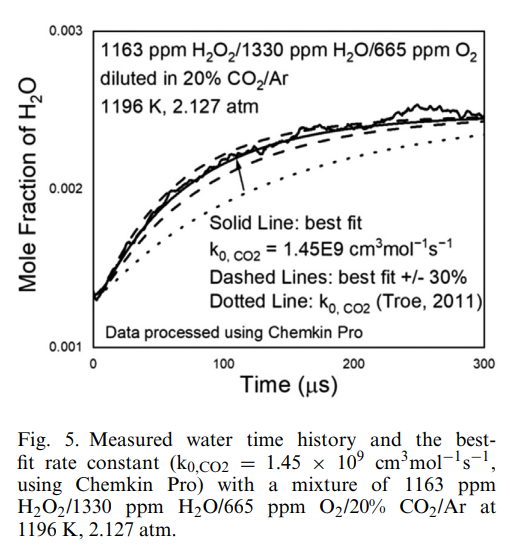

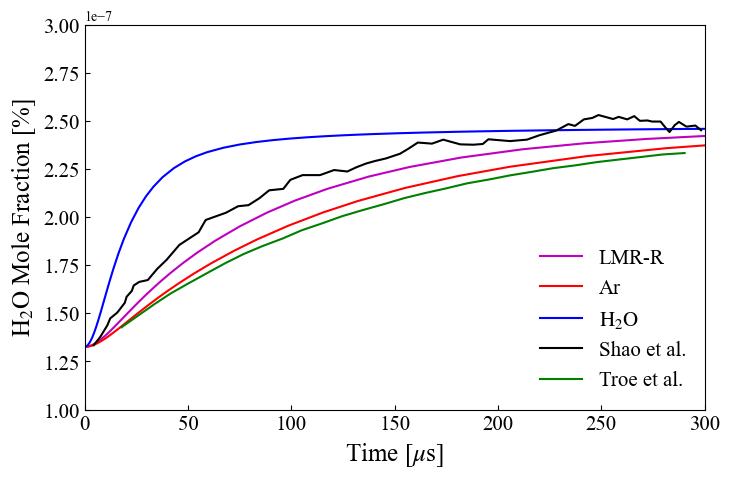

In [4]:
import matplotlib as mpl
import sys, os
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple
save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
name = 'FIG1' #os.path.splitext(os.path.basename(__file__))[0]

refSpecies='H2O'
X_H2O2 = 1163e-6
X_H2O = 1330e-6
X_O2 = 665e-6
X_CO2= 0.2*(1-X_H2O2-X_H2O-X_O2)
X_Ar = 1-X_CO2
def plotXvsTime(fname,pltlabel,pltcolour):
    # gas = ct.Solution('test/data/Burke_H2_ArBath.yaml')
    gas = ct.Solution(fname)
    gas.TPX = 1196, 2.127*101325, {'H2O2':X_H2O2, 'H2O':X_H2O, 'O2':X_O2, 'CO2':X_CO2, 'AR':X_Ar}
    r = ct.Reactor(contents=gas,energy="on")
    reactorNetwork = ct.ReactorNet([r]) # this will be the only reactor in the network
    timeHistory = ct.SolutionArray(gas, extra=['t'])
    estIgnitDelay = 1
    t = 0
    counter = 1
    while t < estIgnitDelay:
        t = reactorNetwork.step()
        if counter % 10 == 0:
            timeHistory.append(r.thermo.state, t=t)
        counter += 1
    tConv = 1e6 #time conversion factor (1e6 converts to microseconds)
    timeShift=0 # [seconds]
    shiftedTime = tConv*(timeHistory.t - timeShift)
    moleFrac = timeHistory(refSpecies).X 
    ax.plot(shiftedTime, moleFrac/10000, color=pltcolour,label=pltlabel)

path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
# path=os.getcwd()

def plotPoints(filename,mkr='none',line='none',fill='none',colour='k',subplot='off',pltLabel="_hidden"):
    dataset = pd.read_csv(filename)
    ax.plot(dataset.iloc[:,0],dataset.iloc[:,1]/10000,mkr,fillstyle=fill,linestyle=line,color=colour,label=pltLabel)

plotXvsTime("test/data/alzuetamechanism_LMRR.yaml","LMR-R","m")
plotXvsTime("test/data/alzuetamechanism_LMRR_allAR.yaml","Ar","r")
plotXvsTime("test/data/alzuetamechanism_LMRR_allH2O.yaml",r'$\rm H_2O$',"b")
plotPoints(path+'\\7 SP H2O X vs t (Shock Tube) (Shao)\\expData.csv',pltLabel='Shao et al.',line='solid',colour='k')
plotPoints(path+'\\7 SP H2O X vs t (Shock Tube) (Shao)\\troe_k0co2.csv',pltLabel='Troe et al.',line='solid',colour='g')
    
ax.legend(fontsize=15, frameon=False, loc='lower right')  
ax.set_ylabel(r'$\rm H_2O$ Mole Fraction [%]', fontsize=18)
ax.set_xlabel(r'Time [$\mu$s]', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.set_xlim([0,300])
ax.set_ylim([0.001/10000,0.003/10000])

if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()     

In [ ]:
#SHAO 3%H2/1.5%O2/AR (FROM SUPPLEMENTARY MATERIALS)

import matplotlib as mpl
import sys, os
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple
save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
name = 'FIG1' #os.path.splitext(os.path.basename(__file__))[0]

refSpecies='H2O'
X_H2O2 = 1163e-6
X_H2O = 1330e-6
X_O2 = 665e-6
X_CO2= 0.2*(1-X_H2O2-X_H2O-X_O2)
X_Ar = 1-X_CO2
def plotXvsTime(fname,pltlabel,pltcolour):
    # gas = ct.Solution('test/data/Burke_H2_ArBath.yaml')
    gas = ct.Solution(fname)
    gas.TPX = 1196, 2.127*101325, {'H2O2':X_H2O2, 'H2O':X_H2O, 'O2':X_O2, 'CO2':X_CO2, 'AR':X_Ar}
    r = ct.Reactor(contents=gas,energy="on")
    reactorNetwork = ct.ReactorNet([r]) # this will be the only reactor in the network
    timeHistory = ct.SolutionArray(gas, extra=['t'])
    estIgnitDelay = 1
    t = 0
    counter = 1
    while t < estIgnitDelay:
        t = reactorNetwork.step()
        if counter % 10 == 0:
            timeHistory.append(r.thermo.state, t=t)
        counter += 1
    tConv = 1e6 #time conversion factor (1e6 converts to microseconds)
    timeShift=0 # [seconds]
    shiftedTime = tConv*(timeHistory.t - timeShift)
    moleFrac = timeHistory(refSpecies).X 
    ax.plot(shiftedTime, moleFrac/10000, color=pltcolour,label=pltlabel)

path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
# path=os.getcwd()

def plotPoints(filename,mkr='none',line='none',fill='none',colour='k',subplot='off',pltLabel="_hidden"):
    dataset = pd.read_csv(filename)
    ax.plot(dataset.iloc[:,0],dataset.iloc[:,1]/10000,mkr,fillstyle=fill,linestyle=line,color=colour,label=pltLabel)

plotXvsTime("test/data/alzuetamechanism_LMRR.yaml","LMR-R","m")
plotXvsTime("test/data/alzuetamechanism_LMRR_allAR.yaml","Ar","r")
plotXvsTime("test/data/alzuetamechanism_LMRR_allH2O.yaml",r'$\rm H_2O$',"b")
plotPoints(path+'\\7 SP H2O X vs t (Shock Tube) (Shao)\\expData.csv',pltLabel='Shao et al.',line='solid',colour='k')
plotPoints(path+'\\7 SP H2O X vs t (Shock Tube) (Shao)\\troe_k0co2.csv',pltLabel='Troe et al.',line='solid',colour='g')
    
ax.legend(fontsize=15, frameon=False, loc='lower right')  
ax.set_ylabel(r'$\rm H_2O$ Mole Fraction [%]', fontsize=18)
ax.set_xlabel(r'Time [$\mu$s]', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.set_xlim([0,300])
ax.set_ylim([0.001/10000,0.003/10000])

if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()     

### 3) SPECIES PROFILE: CONCENTRATION VS TEMPERATURE
#### 3.1) H2/O2/Ar/H2O mixture 
* Figure 1: ["Mutual inhibition effect of hydrogen and ammonia in oxidation processes and the role of ammonia as “strong” collider in third-molecular reactions" (Sabia et al.)](https://drive.google.com/file/d/1lvcGuuSI6QafO6S_lkemsA5UyTIxl1Lr/view?usp=sharing)

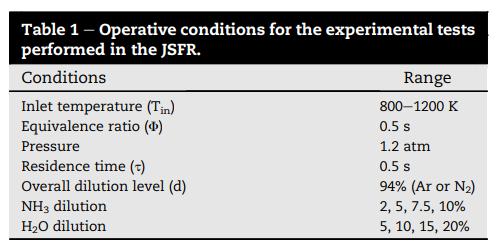
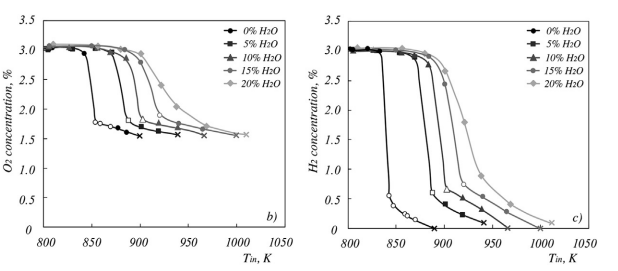

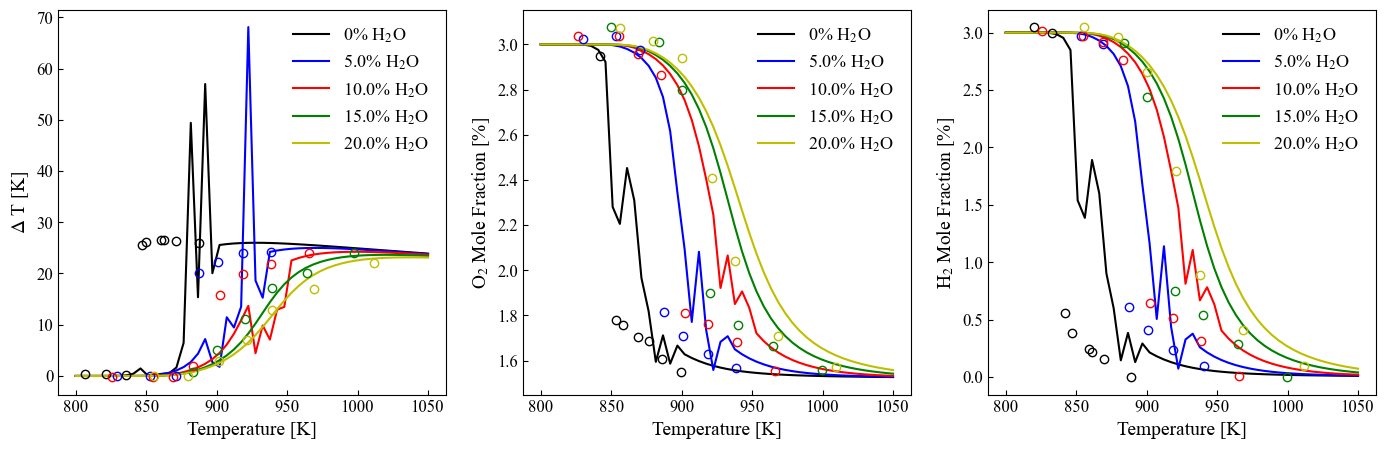

In [3]:
#%%
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import time
# import cantera as ct
import os.path
from os import path
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'

f, ax = plt.subplots(1, 3, figsize=(17, 5))

model = "test/data/alzuetamechanism_LMRR.yaml"

T_list = np.linspace(800,1050,50)
P = 1.2
tau = 0.5

# NH3_con_list = [0.02, 0.05, 0.075, 0.10]
# H2O_con_list = [0, 0.05, 0.10, 0.15, 0.20]
diluent = 0.94
H2Opercent_list = [0, 0.05, 0.10, 0.15, 0.20]

colors = ['k','b','r','g','y']
lines =['-','-','-','-','-']


##############################################################################################################################

reactorTemperature = 1000  # Kelvin
reactorPressure = P*ct.one_atm  # in atm. This equals 1.06 bars
residenceTime = tau  # s
reactorVolume = 0.000113 #30.5*(1e-2)**3  # m3
reactorRadius = np.cbrt(reactorVolume*3/4*np.pi) # m3
reactorSurfaceArea = 4*np.pi*np.square(reactorRadius) # m3
pressureValveCoefficient = 0.01
maxPressureRiseAllowed = 0.01
maxSimulationTime = 50  # seconds
heatTransferCoefficient = 7949.6
heatTransferCoefficient = 7.9496*2.2
tempDependence = []

##############################################################################################################################

for i, H2Opercent in enumerate(H2Opercent_list):
    
    H2O = diluent * H2Opercent
    Ar = diluent * (1-H2Opercent)
    reactants = {'H2': 0.03, 'O2': 0.03, 'Ar': Ar, 'H2O':H2O}    
    
    # for j, T in enumerate(T_list):
    
    concentrations = reactants
    gas = ct.Solution(model)
    gas.TPX = reactorTemperature, reactorPressure, concentrations 
    fuelAirMixtureTank = ct.Reservoir(gas)
    exhaust = ct.Reservoir(gas)
    env = ct.Reservoir(gas)
    stirredReactor = ct.IdealGasReactor(gas, energy='on', volume=reactorVolume)
    massFlowController = ct.MassFlowController(upstream=fuelAirMixtureTank,
                                                downstream=stirredReactor,
                                                mdot=stirredReactor.mass/residenceTime)
    pressureRegulator = ct.Valve(upstream=stirredReactor,
                                downstream=exhaust,
                                K=pressureValveCoefficient)
    w2 = ct.Wall(stirredReactor, env, A=reactorSurfaceArea, U=heatTransferCoefficient)
    reactorNetwork = ct.ReactorNet([stirredReactor])
    columnNames = [stirredReactor.component_name(item) for item in range(stirredReactor.n_vars)]
    
    columnNames = ['pressure'] + columnNames
    timeHistory = pd.DataFrame(columns=columnNames)
    tic = time.time()
    # reactorNetwork.rtol = 1.0e-6
    # reactorNetwork.atol = 1.0e-15
    t = 0
    counter = 1
    while t < maxSimulationTime:
        t = reactorNetwork.step()
        if(counter%10 == 0):
            state = np.hstack([stirredReactor.thermo.P, stirredReactor.mass, 
                        stirredReactor.volume, stirredReactor.T, stirredReactor.thermo.X])
            timeHistory.loc[t] = state
        counter += 1
    toc = time.time()
    
    pressureDifferential = timeHistory['pressure'].max()-timeHistory['pressure'].min()
    if(abs(pressureDifferential/reactorPressure) > maxPressureRiseAllowed):
        print("WARNING: Non-trivial pressure rise in the reactor. Adjust K value in valve")
        
    tempDependence.append(pd.DataFrame(columns=timeHistory.columns))
    tempDependence[i].index.name = 'Temperature'
    
    inletConcentrations = concentrations
    
    for j,T in enumerate(T_list): #temperature in T:
        reactorTemperature = T #temperature  # Kelvin
        gas.TPX = reactorTemperature, reactorPressure, inletConcentrations
        timeHistory = pd.DataFrame(columns=columnNames)
        fuelAirMixtureTank = ct.Reservoir(gas)
        exhaust = ct.Reservoir(gas)
        env = ct.Reservoir(gas)
        # gas.TPX = reactorTemperature, reactorPressure, concentrations
        stirredReactor = ct.IdealGasReactor(gas, energy='on', volume=reactorVolume)
        
        massFlowController = ct.MassFlowController(upstream=fuelAirMixtureTank,
                                                downstream=stirredReactor,
                                                mdot=stirredReactor.mass/residenceTime)
        pressureRegulator = ct.Valve(upstream=stirredReactor, 
                                    downstream=exhaust, 
                                    K=pressureValveCoefficient)
        w2 = ct.Wall(stirredReactor, env, A=reactorSurfaceArea, U=heatTransferCoefficient)
        reactorNetwork = ct.ReactorNet([stirredReactor])
        tic = time.time()
        t = 0
        while t < maxSimulationTime:
            t = reactorNetwork.step()
        state = np.hstack([stirredReactor.thermo.P, 
                        stirredReactor.mass, 
                        stirredReactor.volume, 
                        stirredReactor.T, 
                        stirredReactor.thermo.X])
        toc = time.time()
        concentrations = stirredReactor.thermo.X
        tempDependence[i].loc[T] = state

    # ax[0]
    
    if i == 0:
        
        chopped_range = [835,900]
        chopped_index = [abs(np.subtract(tempDependence[i].index,chopped_range[0])).argmin(), abs(np.subtract(tempDependence[i].index,chopped_range[1])).argmin()]
        ax[0].plot(list(tempDependence[i].index)[:chopped_index[0]], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[1].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['O2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[2].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['H2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        
        ax[0].plot(list(tempDependence[i].index)[chopped_index[1]:], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[1].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['O2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[2].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['H2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
    elif i == 1:
        
        chopped_range = [880,940] 
        chopped_index = [abs(np.subtract(tempDependence[i].index,chopped_range[0])).argmin(), abs(np.subtract(tempDependence[i].index,chopped_range[1])).argmin()]
        ax[0].plot(list(tempDependence[i].index)[:chopped_index[0]], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[1].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['O2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[2].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['H2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        
        ax[0].plot(list(tempDependence[i].index)[chopped_index[1]:], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[1].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['O2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[2].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['H2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
             
    elif i == 2:
        
        chopped_range = [920,953]
        
        chopped_index = [abs(np.subtract(tempDependence[i].index,chopped_range[0])).argmin(), abs(np.subtract(tempDependence[i].index,chopped_range[1])).argmin()]
 
        ax[0].plot(list(tempDependence[i].index)[:chopped_index[0]], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[1].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['O2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[2].plot(list(tempDependence[i].index)[:chopped_index[0]], list(tempDependence[i]['H2']*100)[:chopped_index[0]], color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        
        ax[0].plot(list(tempDependence[i].index)[chopped_index[1]:], list(np.subtract(tempDependence[i]['temperature'],tempDependence[i].index))[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[1].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['O2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
        ax[2].plot(list(tempDependence[i].index)[chopped_index[1]:], list(tempDependence[i]['H2']*100)[chopped_index[1]:], color=colors[i], linestyle=lines[i])   
                                          
    else:
        ax[0].plot(tempDependence[i].index, np.subtract(tempDependence[i]['temperature'],tempDependence[i].index), color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[1].plot(tempDependence[i].index, tempDependence[i]['O2']*100, color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O')   
        ax[2].plot(tempDependence[i].index, tempDependence[i]['H2']*100, color=colors[i], linestyle=lines[i], label=str(H2Opercent*100)+'% H$_2$O') 

path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\1 JSR H2O\\"

T_0_data = pd.read_csv(path+'JSR_T_H2O_0_data.csv') 
T_5_data = pd.read_csv(path+'JSR_T_H2O_5_data.csv') 
T_10_data = pd.read_csv(path+'JSR_T_H2O_10_data.csv') 
T_15_data = pd.read_csv(path+'JSR_T_H2O_15_data.csv') 
T_20_data = pd.read_csv(path+'JSR_T_H2O_20_data.csv') 

O2_0_data = pd.read_csv(path+'JSR_O2_H2O_0_data.csv') 
O2_5_data = pd.read_csv(path+'JSR_O2_H2O_5_data.csv') 
O2_10_data = pd.read_csv(path+'JSR_O2_H2O_10_data.csv') 
O2_15_data = pd.read_csv(path+'JSR_O2_H2O_15_data.csv') 
O2_20_data = pd.read_csv(path+'JSR_O2_H2O_20_data.csv') 

H2_0_data = pd.read_csv(path+'JSR_H2_H2O_0_data.csv') 
H2_5_data = pd.read_csv(path+'JSR_H2_H2O_5_data.csv') 
H2_10_data = pd.read_csv(path+'JSR_H2_H2O_10_data.csv') 
H2_15_data = pd.read_csv(path+'JSR_H2_H2O_15_data.csv') 
H2_20_data = pd.read_csv(path+'JSR_H2_H2O_20_data.csv') 

ax[0].plot(T_0_data.iloc[:, 0],T_0_data.iloc[:, 1],marker='o',color=colors[0], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[0].plot(T_5_data.iloc[:, 0],T_5_data.iloc[:, 1],marker='o',color=colors[1], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[0].plot(T_10_data.iloc[:, 0],T_10_data.iloc[:, 1],marker='o',color=colors[2], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[0].plot(T_15_data.iloc[:, 0],T_15_data.iloc[:, 1],marker='o',color=colors[3], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[0].plot(T_20_data.iloc[:, 0],T_20_data.iloc[:, 1],marker='o',color=colors[4], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')

ax[1].plot(O2_0_data.iloc[:, 0],O2_0_data.iloc[:, 1],marker='o',color=colors[0], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[1].plot(O2_5_data.iloc[:, 0],O2_5_data.iloc[:, 1],marker='o',color=colors[1], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[1].plot(O2_10_data.iloc[:, 0],O2_10_data.iloc[:, 1],marker='o',color=colors[2], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[1].plot(O2_15_data.iloc[:, 0],O2_15_data.iloc[:, 1],marker='o',color=colors[3], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[1].plot(O2_20_data.iloc[:, 0],O2_20_data.iloc[:, 1],marker='o',color=colors[4], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')

ax[2].plot(H2_0_data.iloc[:, 0],H2_0_data.iloc[:, 1],marker='o',color=colors[0], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[2].plot(H2_5_data.iloc[:, 0],H2_5_data.iloc[:, 1],marker='o',color=colors[1], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[2].plot(H2_10_data.iloc[:, 0],H2_10_data.iloc[:, 1],marker='o',color=colors[2], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[2].plot(H2_15_data.iloc[:, 0],H2_15_data.iloc[:, 1],marker='o',color=colors[3], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
ax[2].plot(H2_20_data.iloc[:, 0],H2_20_data.iloc[:, 1],marker='o',color=colors[4], markersize=6, zorder=2, fillstyle='none', linestyle = 'None')
     
ax[0].set_xlabel('Temperature [K]',fontsize=14)
ax[0].set_ylabel(r'$\Delta$ T [K]',fontsize=14)
ax[0].tick_params(axis='both',direction='in',labelsize=12)
ax[0].legend(frameon=False,fontsize=13)#,loc='lower right')
            
ax[1].set_xlabel('Temperature [K]',fontsize=14)
ax[1].set_ylabel('O$_2$ Mole Fraction [%]',fontsize=14)
ax[1].tick_params(axis='both',direction='in',labelsize=12)
ax[1].legend(frameon=False,fontsize=13)#,loc='upper right')

ax[2].set_xlabel('Temperature [K]',fontsize=14)
ax[2].set_ylabel('H$_2$ Mole Fraction [%]',fontsize=14)
ax[2].tick_params(axis='both',direction='in',labelsize=12)
ax[2].legend(frameon=False,fontsize=13)#,loc='upper right')

plt.show()


#### 3.2) H2/O2/NH3/H2O mixture 
* Figure 2: ["Mutual inhibition effect of hydrogen and ammonia in oxidation processes and the role of ammonia as “strong” collider in third-molecular reactions" (Sabia et al.)](https://drive.google.com/file/d/1lvcGuuSI6QafO6S_lkemsA5UyTIxl1Lr/view?usp=sharing)

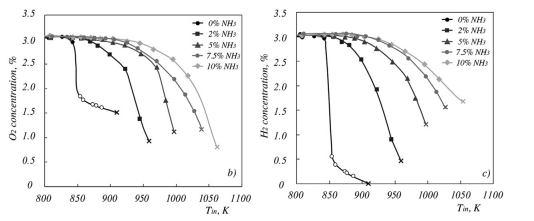

In [24]:
#REPRODUCING FIG 2
plt.figure()
fname="test/data/alzuetamechanism.yaml"
plotXvsTemp(fname,"0% NH3","k",fuel='H2:1',oxidizer='O2:1',diluent='Ar:1.00,NH3:0.00',refSpecies='H2')
plotXvsTemp(fname,"5% NH3","k",fuel='H2:1',oxidizer='O2:1',diluent="Ar:0.95,NH3:0.05",refSpecies='H2')
plotXvsTemp(fname,"10% NH3","k",fuel='H2:1',oxidizer='O2:1',diluent="Ar:0.90,NH3:0.10",refSpecies='H2')
plotXvsTemp(fname,"15% NH3","k",fuel='H2:1',oxidizer='O2:1',diluent="Ar:0.85,NH3:0.15",refSpecies='H2')
plotXvsTemp(fname,"20% NH3","k",fuel='H2:1',oxidizer='O2:1',diluent="Ar:0.80,NH3:0.20",refSpecies='H2')
plt.xlim([800,1050])
plt.ylim([0,3.5])
plt.ylabel("Mole Fraction of H2",**hfont)
plt.xlabel("Tin,K", **hfont)
plt.legend()
plt.show()

NameError: name 'plotXvsTemp' is not defined

<Figure size 640x480 with 0 Axes>

### 4) IGNITION DELAY TIME VS. TEMPERATURE
#### 4.1) H2/O2/N2 mixture 


* Figure 12: ["Ignition delay study of moist hydrogen/oxidizer mixtures using a rapid compression machine" (Das et al.)](https://drive.google.com/file/d/15wt6MQaSOY0MV6X_JQWMCGz20SSRR40R/view?usp=sharing)

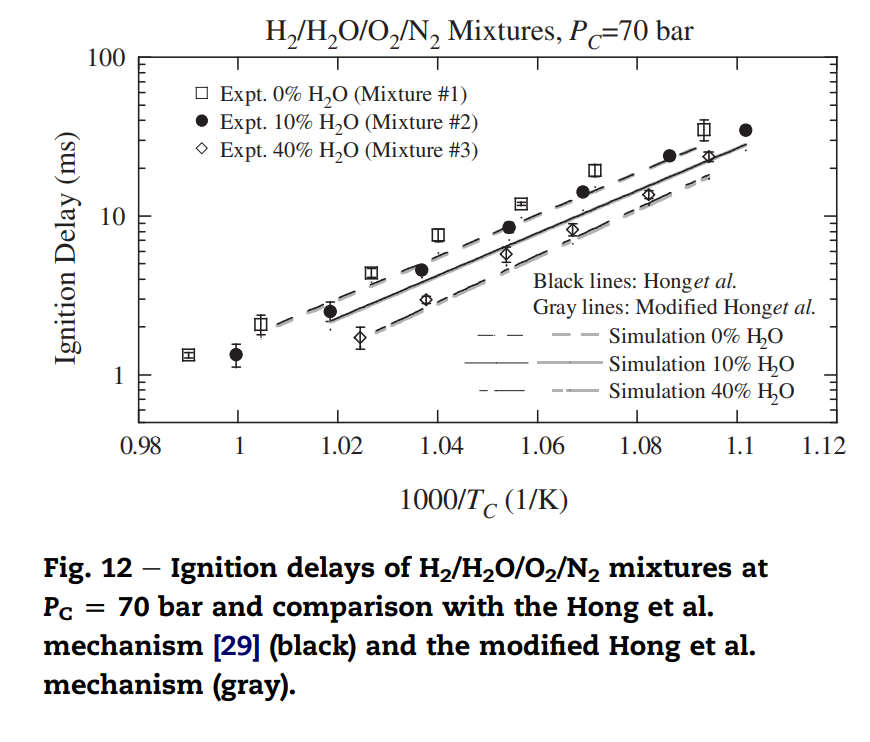

* Further reading: ["Estimation of third body efficiencies from experimental data: Application to hydrogen combustion" (Bertolino et al.)](https://drive.google.com/file/d/1b9eeWRiobquzTYwrdVpy5um8qbhHkl9T/view?usp=sharing)


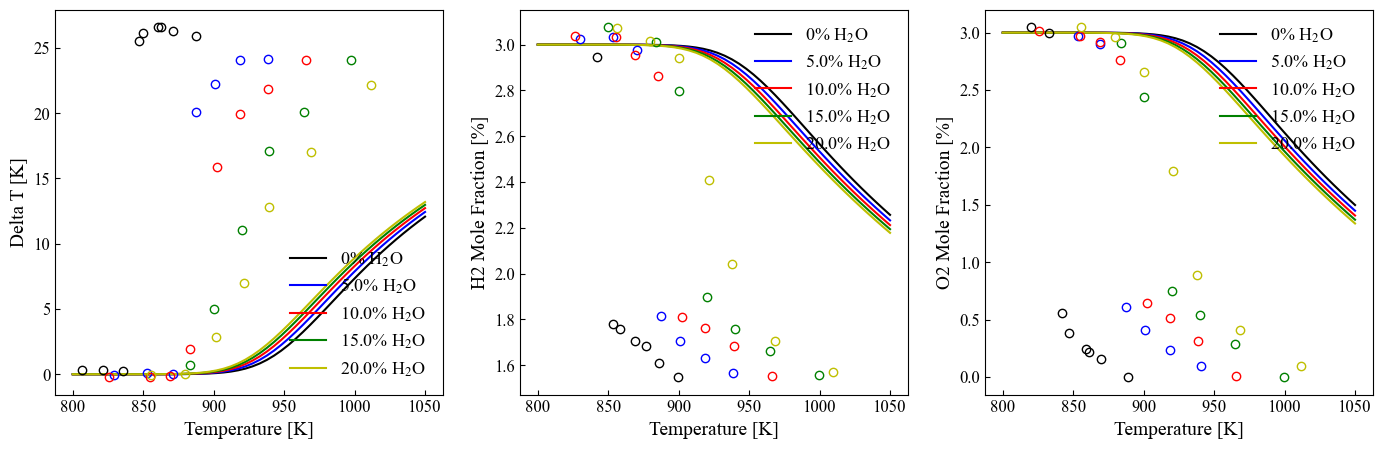

In [15]:
#REPRODUCING FIG 12
def plotIgnitionDelay_Fig12(fname,T,P,X,pltColour,pltLabel="_hidden",tConv=1e3): #tConv=1e3 converts from s to ms by default 
    refSpecies = "OH"
    estimated_ignition_delay_times = 0.015*np.ones_like(T, dtype=float)
    gas = ct.Solution(fname)
    ignition_delays = ct.SolutionArray(gas, shape=T.shape, extra={"tau": estimated_ignition_delay_times})
    ignition_delays.TPX = T, P, X # [K], [Pa], [-]
    tau_list=[]
    for i, state in enumerate(ignition_delays):
        gas.TPX = state.TPX
        r = ct.Reactor(contents=gas, energy='on')
        reactor_network = ct.ReactorNet([r])
        refSpecies_history = []
        time_history = []
        t = 0
        while t < estimated_ignition_delay_times[i]:
            t = reactor_network.step()
            time_history.append(t)
            refSpecies_history.append(gas[refSpecies].X[0])
        i_ign = np.array(refSpecies_history).argmax()
        tau = time_history[i_ign]
        tau_list.append(tau) 
    plt.semilogy(1000 / ignition_delays.T, np.multiply(tConv,tau_list),'-',color=pltColour, marker=None,label=pltLabel)

plt.figure()
fname='test/data/alzuetamechanism.yaml'
P=70e5

T=np.divide(1000,np.arange(1.00789, 1.0915, 0.001))
X={'H2':0.125, 'O2':0.0625, 'H2O':0, 'N2':0.8125}
plotIgnitionDelay_Fig12(fname,T,P,X,'k',pltLabel='Mix1 0% H2O')

T=np.divide(1000,np.arange(1.018665, 1.10167, 0.001))
X={'H2':0.125, 'O2':0.0625, 'H2O':0.1, 'N2':0.7125}
plotIgnitionDelay_Fig12(fname,T,P,X,'r',pltLabel='Mix2 10% H2O')

T=np.divide(1000,np.arange(1.018665, 1.10167, 0.001))
X={'H2':0.125, 'O2':0.0625, 'H2O':0.4, 'N2':0.4125}
plotIgnitionDelay_Fig12(fname,T,P,X,'g',pltLabel='Mix3 40% H2O')

plt.title("Reproducing Fig. 12 (Das et al.)")
plt.ylabel("Ignition delay time (ms)",**hfont)
plt.xlabel(r"1000/T (K^-1)", **hfont)
plt.ylim([0.4,100])
plt.xlim([0.98,1.12])
plt.legend()
plt.show()

#### 4.2) NH3/O2/Ar mixture 
* Figure 9: ["A shock tube study of fuel concentration effect on high-pressure autoignition delay of ammonia" (Peng et al.)](https://drive.google.com/file/d/1JO1HS3WTDgLyB6KY0jVLoKAWNhu3Th0B/view?usp=sharing)

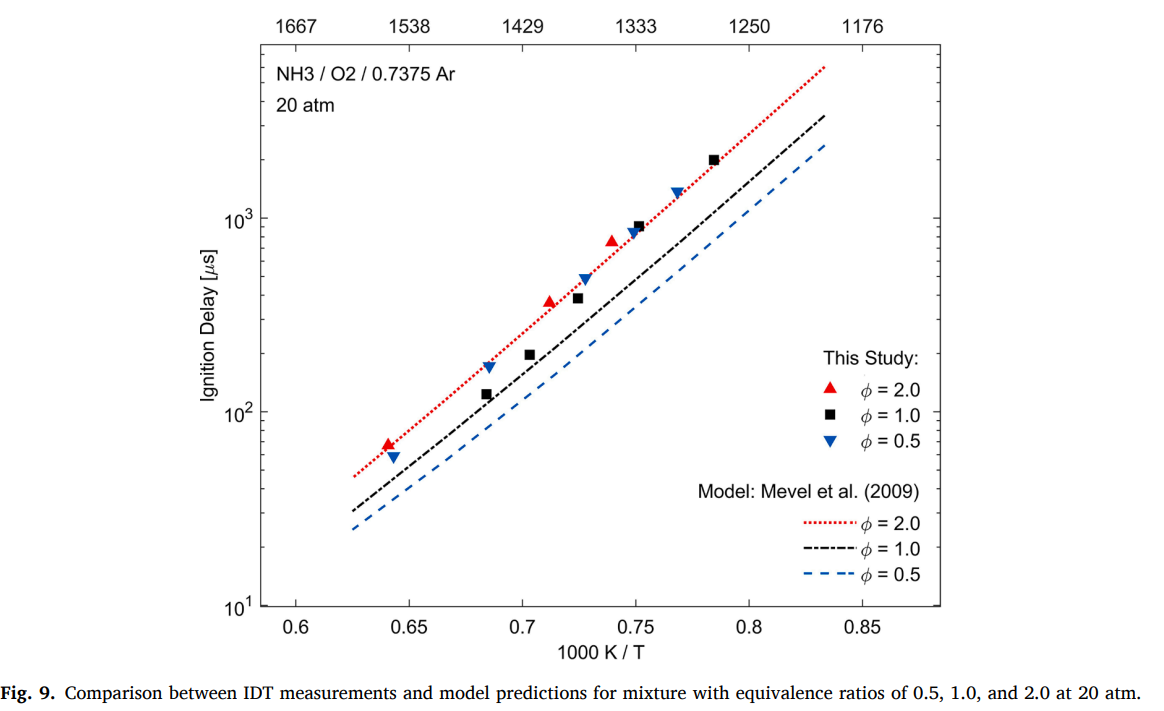

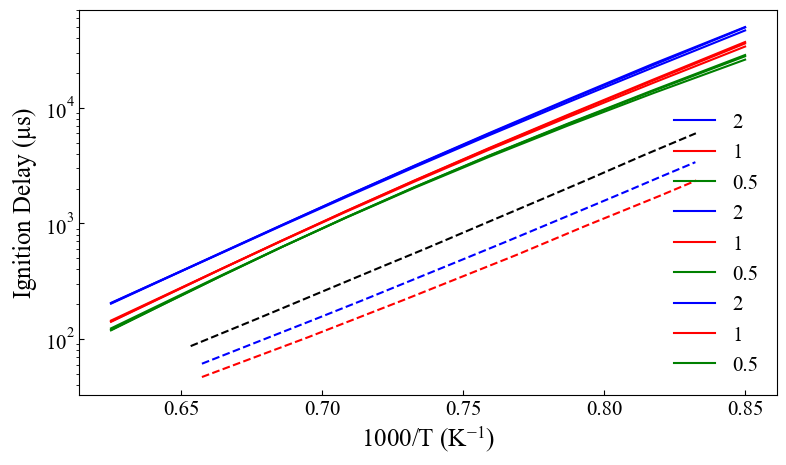

In [24]:
# #REPRODUCING FIG 9
# def plotIgnitionDelay_Fig9(fname,phi,pltColour,pltLabel="_hidden"): #ign delays plotted in units of μs by default
#     T=np.divide(1000,np.arange(0.47, 0.65, 0.001))
#     P=20*101325
#     refSpecies = "O"
#     estimated_ignition_delay_times = 0.7*np.ones_like(T, dtype=float)
#     gas = ct.Solution(fname)
#     ignition_delays = ct.SolutionArray(gas, shape=T.shape, extra={"tau": estimated_ignition_delay_times})
#     ignition_delays.TP = T, P
#     ignition_delays.set_equivalence_ratio(phi,'NH3','O2',diluent='Ar:1', fraction={"diluent":0.7375},basis='mole')
#     tau_list=[]
#     for i, state in enumerate(ignition_delays):
#         gas.TPX = state.TPX
#         r = ct.Reactor(contents=gas, energy='on')
#         reactor_network = ct.ReactorNet([r])
#         refSpecies_history = []
#         time_history = []
#         t = 0
#         while t < estimated_ignition_delay_times[i]:
#             t = reactor_network.step()
#             time_history.append(t)
#             refSpecies_history.append(gas[refSpecies].X[0])
#         i_ign = np.array(refSpecies_history).argmax()
#         tau = time_history[i_ign]
#         tau_list.append(tau) 
#     plt.semilogy(1000 / ignition_delays.T, np.multiply(1e6,tau_list),'-',color=pltColour, marker=None,label=pltLabel)


# plt.figure()
# fname='test/data/alzuetamechanism.yaml'
# plotIgnitionDelay_Fig9(fname,0.5,'k',pltLabel="phi=0.5")
# plotIgnitionDelay_Fig9(fname,1.0,'b',pltLabel="phi=1.0")
# plotIgnitionDelay_Fig9(fname,2.0,'g',pltLabel="phi=2.0")

# plt.title("Reproducing Fig. 9 (Peng et al.)")
# plt.ylabel("Ignition delay time [μs]",**hfont)
# plt.xlabel(r"1000/T (K^-1)", **hfont)
# plt.ylim([10,5000])
# plt.xlim([0.58,0.899])
# plt.legend()
# plt.show()

#%%
import sys, os
# import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd 
import time
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple
# plt.rcParams['axes.labelsize'] = 18
save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
name = 'IDT_NH3'
# # model = 'D:\\Research\\Models\\Hong\\hong.cti'
# model = 'D:\\Research\\Models\\Mevel\\mevel.yaml'
model = 'test/data/alzuetamechanism_LMRR.yaml'

def pltIGD(model,style='solid'):
    # model = 'D:\\Research\\Models\\Glarborg\\reduced_glarborg.cti'
    def ignitionDelay(states, species):
        # i_ign = states(species).Y.argmax()
        i_ign = np.gradient(states(species).Y.T[0]).argmax()
        return states.t[i_ign]
    colors = ['b', 'r', 'g']
    P = 20
    gas = ct.Solution(model)
    # T = np.array([1250, 1050, 975, 912.5, 800])
    T_list = np.linspace(1000/0.625,1000/0.85,10)[::-1]
    phi_list = [2,1,0.5]
    for i, phi in enumerate(phi_list):
        estimatedIgnitionDelayTimes = np.ones(len(T_list))
        estimatedIgnitionDelayTimes[:] = 0.05
        ignitionDelays_RG = np.zeros(len(T_list))
        for j, T in enumerate(T_list):
            gas = ct.Solution(model)
            Ar = 0.7375
            NH3_ratio = 4 * phi
            O2_ratio = 3
            total_ratio = NH3_ratio + O2_ratio
            NH3 = (NH3_ratio/total_ratio) * (1 - Ar)
            O2 = (O2_ratio/total_ratio) * (1 - Ar)
            
            gas.TPX = T, P*ct.one_atm, {'NH3':NH3, 'O2':O2, 'Ar':Ar}
            r = ct.Reactor(contents=gas)
            reactorNetwork = ct.ReactorNet([r])
            timeHistory = ct.SolutionArray(gas, extra=['t'])
            t0 = time.time()
            t = 0
            counter = 1
            while t < estimatedIgnitionDelayTimes[j]:
                t = reactorNetwork.step()
                if counter % 1 == 0:
                    timeHistory.append(r.thermo.state, t=t)
                counter += 1
            tau = ignitionDelay(timeHistory, 'oh')
            t1 = time.time()
            # print("Computed Real Gas Ignition Delay: {:.3e} seconds for T={}K. "
            #       "Took {:3.2f}s to compute".format(tau, temperature, t1-t0))
            ignitionDelays_RG[j] = tau
        ax.semilogy(1000/T_list, 1e6*ignitionDelays_RG, linestyle=style, color=colors[i], label=str(phi))
# pltIGD('test/data/mevel.yaml','dashed')
pltIGD('test/data/alzuetamechanism_LMRR.yaml')
pltIGD('test/data/alzuetamechanism_LMRR_allAR.yaml')
pltIGD('test/data/alzuetamechanism_LMRR_allH2O.yaml')
path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
dataset0 = pd.read_csv(path+'\\4 IDT NH3 (Peng)\\Sim phi2pt0.csv')
dataset10 = pd.read_csv(path+'\\4 IDT NH3 (Peng)\\Sim phi1pt0.csv')
dataset40 = pd.read_csv(path+'\\4 IDT NH3 (Peng)\\Sim phi0pt5.csv')
ax.plot(dataset0.iloc[:,0],dataset0.iloc[:,1],linestyle='dashed',color=colors[0])
ax.plot(dataset10.iloc[:,0],dataset10.iloc[:,1],linestyle='dashed',color=colors[1])
ax.plot(dataset40.iloc[:,0],dataset40.iloc[:,1],linestyle='dashed',color=colors[2])  
ax.legend(fontsize=15, frameon=False)#, loc='upper right')  
ax.set_ylabel(r'Ignition Delay ($\mathdefault{\mu s}$)', fontsize=18)
ax.set_xlabel(r'1000/T (K$^\mathdefault{-1}$)', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
# ax.set_xlim([0,300])
# ax.set_ylim([0.001,0.003])
if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()  

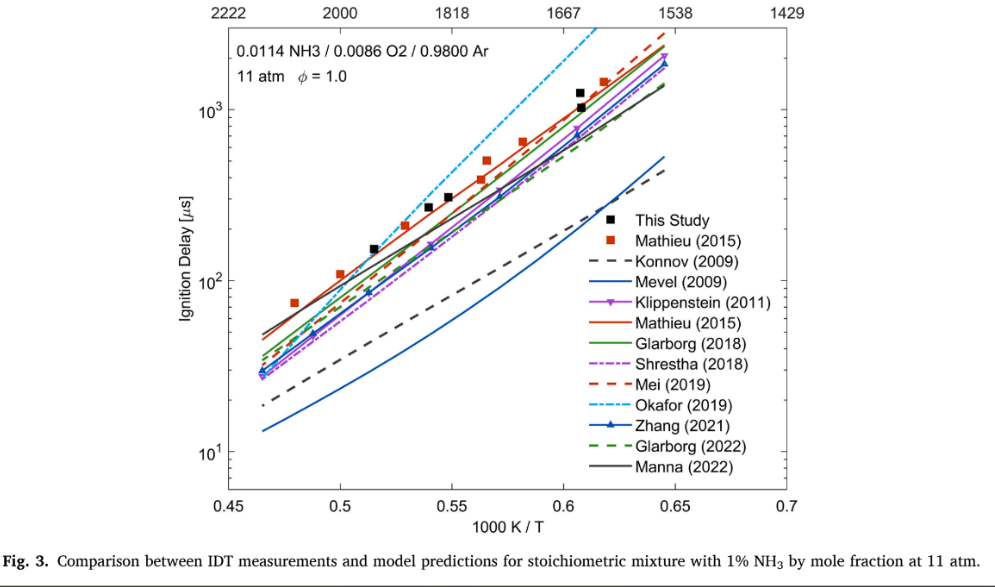

C:\Users\pjsin\AppData\Local\Temp\ipykernel_32236\2389932733.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.semilogy(1000/T_list, 1e6*ignitionDelays_RG, '-', linestyle='solid', color=colors[i], label=m)


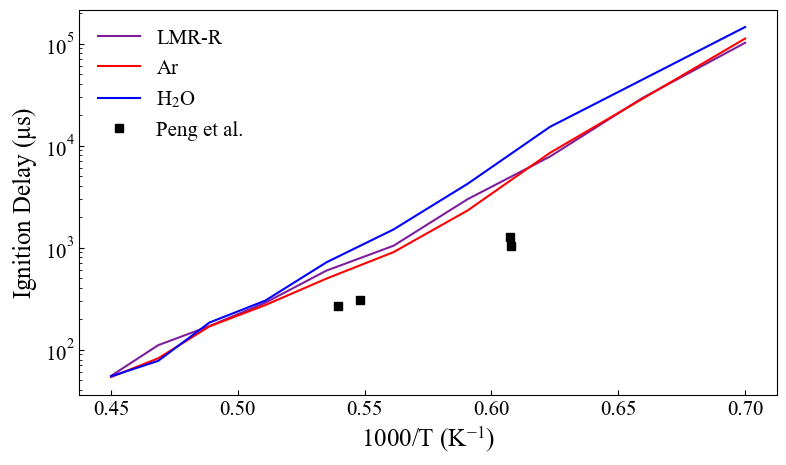

In [46]:
#PENG FIGURE 3
import sys, os
import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd 
import time
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple
# plt.rcParams['axes.labelsize'] = 18

save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
name = 'IDT_NH3_fig3'

models = {
        #   'mevel':'D:\\Research\\Models\\Mevel\\mevel.cti',
          'LMR-R':"test/data/alzuetamechanism_LMRR.yaml",            
          'Ar':"test/data/alzuetamechanism_LMRR_allAR.yaml",
          r'H$_2$O':"test/data/alzuetamechanism_LMRR_allH2O.yaml",
          }

colors = ['xkcd:purple','r','b']

def ignitionDelay(states, species):
    # i_ign = states(species).Y.argmax()
    i_ign = np.gradient(states(species).Y.T[0]).argmax()
    return states.t[i_ign]

P = 11
T_list = np.linspace(1000/0.45,1000/0.7,10)

for i, m in enumerate(list(models.keys())):

    estimatedIgnitionDelayTimes = np.ones(len(T_list))
    estimatedIgnitionDelayTimes[:] = 5

    ignitionDelays_RG = np.zeros(len(T_list))
    for j, T in enumerate(T_list):
        gas = ct.Solution(list(models.values())[i])
        gas.TPX = T, P*ct.one_atm, {'NH3':0.0114, 'O2':0.0086, 'Ar':0.9800}
        r = ct.Reactor(contents=gas)
        reactorNetwork = ct.ReactorNet([r])
        timeHistory = ct.SolutionArray(gas, extra=['t'])
        t0 = time.time()
        t = 0
        counter = 1
        while t < estimatedIgnitionDelayTimes[j]:
            t = reactorNetwork.step()
            if counter % 1 == 0:
                timeHistory.append(r.thermo.state, t=t)
            counter += 1
        tau = ignitionDelay(timeHistory, 'oh')
        t1 = time.time()

        # print("Computed Real Gas Ignition Delay: {:.3e} seconds for T={}K. "
        #       "Took {:3.2f}s to compute".format(tau, temperature, t1-t0))
        ignitionDelays_RG[j] = tau
        

    ax.semilogy(1000/T_list, 1e6*ignitionDelays_RG, '-', linestyle='solid', color=colors[i], label=m)


path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
dataset0 = pd.read_csv(path+'\\Peng Fig 3\\Fig3expData.csv')
ax.plot(dataset0.iloc[:, 0],dataset0.iloc[:, 1],marker='s',color='k', markersize=6, zorder=2, fillstyle='full', linestyle = 'None', label="Peng et al.")
ax.legend(fontsize=15, frameon=False)#, loc='upper right')  
ax.set_ylabel(r'Ignition Delay ($\mathdefault{\mu s}$)', fontsize=18)
ax.set_xlabel(r'1000/T (K$^\mathdefault{-1}$)', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.tick_params(axis='both', which='minor', direction="in")#, bottom=False)

if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()        

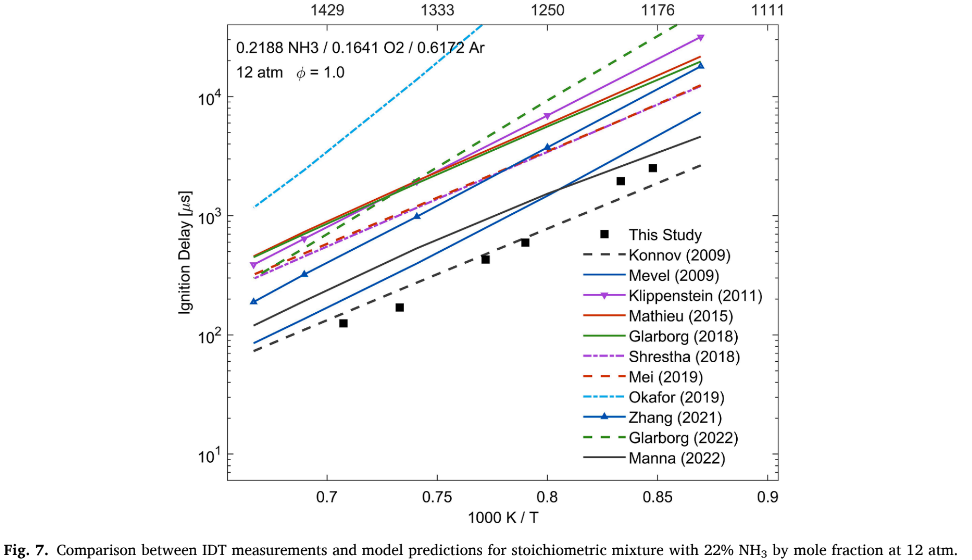

C:\Users\pjsin\AppData\Local\Temp\ipykernel_32236\2815217554.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.semilogy(1000/T_list, 1e6*ignitionDelays_RG, '-', linestyle='solid', color=colors[i], label=m)


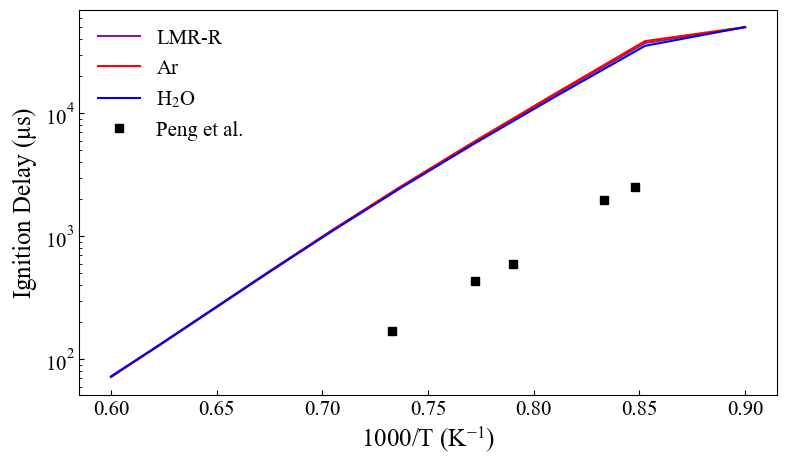

In [47]:
#PENG FIGURE 7 PLOTTING
import sys, os
import matplotlib.pyplot as plt
import pandas as pd 
import time
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple
# plt.rcParams['axes.labelsize'] = 18

save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
name = 'IDT_NH3_fig7'

models = {
        #   'mevel':'D:\\Research\\Models\\Mevel\\mevel.cti',
          'LMR-R':"test/data/alzuetamechanism_LMRR.yaml",            
          'Ar':"test/data/alzuetamechanism_LMRR_allAR.yaml",
          r'H$_2$O':"test/data/alzuetamechanism_LMRR_allH2O.yaml",
          }

colors = ['xkcd:purple','r','b']

def ignitionDelay(states, species):
    # i_ign = states(species).Y.argmax()
    i_ign = np.gradient(states(species).Y.T[0]).argmax()
    return states.t[i_ign]

P = 12
T_list = np.linspace(1000/0.6,1000/0.9,10)

for i, m in enumerate(list(models.keys())):

    estimatedIgnitionDelayTimes = np.ones(len(T_list))
    estimatedIgnitionDelayTimes[:] = 0.05

    ignitionDelays_RG = np.zeros(len(T_list))
    for j, T in enumerate(T_list):
        gas = ct.Solution(list(models.values())[i])
        gas.TPX = T, P*ct.one_atm, {'NH3':0.2188, 'O2':0.1641, 'Ar':0.6172}
        r = ct.Reactor(contents=gas)
        reactorNetwork = ct.ReactorNet([r])
        timeHistory = ct.SolutionArray(gas, extra=['t'])
        t0 = time.time()
        t = 0
        counter = 1
        while t < estimatedIgnitionDelayTimes[j]:
            t = reactorNetwork.step()
            if counter % 1 == 0:
                timeHistory.append(r.thermo.state, t=t)
            counter += 1
        tau = ignitionDelay(timeHistory, 'oh')
        t1 = time.time()

        # print("Computed Real Gas Ignition Delay: {:.3e} seconds for T={}K. "
        #       "Took {:3.2f}s to compute".format(tau, temperature, t1-t0))
        ignitionDelays_RG[j] = tau
        

    ax.semilogy(1000/T_list, 1e6*ignitionDelays_RG, '-', linestyle='solid', color=colors[i], label=m)


path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
dataset0 = pd.read_csv(path+'\\Peng Fig 7\\Fig7expData.csv')
ax.plot(dataset0.iloc[:, 0],dataset0.iloc[:, 1],marker='s',color='k', markersize=6, zorder=2, fillstyle='full', linestyle = 'None', label="Peng et al.")

ax.legend(fontsize=15, frameon=False)#, loc='upper right')  
ax.set_ylabel(r'Ignition Delay ($\mathdefault{\mu s}$)', fontsize=18)
ax.set_xlabel(r'1000/T (K$^\mathdefault{-1}$)', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.tick_params(axis='both', which='minor', direction="in")#, bottom=False)

if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()     

### 5) FLAME BURNING RATE PLOTS
#### 5.1) H2/O2/He mixture 
* Figure 1, 2: ["Assessment of kinetic modeling for lean H2/CH4/O2/diluent flames at high pressures" (Burke et al.)](https://drive.google.com/file/d/1SP44K4k0oS81g19Gny2TQxCgBMXFXboB/view?usp=sharing)
* Further reading: ["Evaluating Mixture Rules for Multi-Component Pressure Dependence: H+O2 (+M)=HO2 (+M)" (Burke et al.)](https://drive.google.com/file/d/1VsMwxM_VrQSqbVT4c5ARn_KthV4oLiWJ/view?usp=sharing), ["Negative pressure dependence of mass burning rates of H2/CO/O2/diluent flames at low flame temperatures" (Burke et al.)](https://drive.google.com/file/d/1vTAJ_EpAyKNhtb_uAUpahS91CbWAw3Ej/view?usp=sharing)

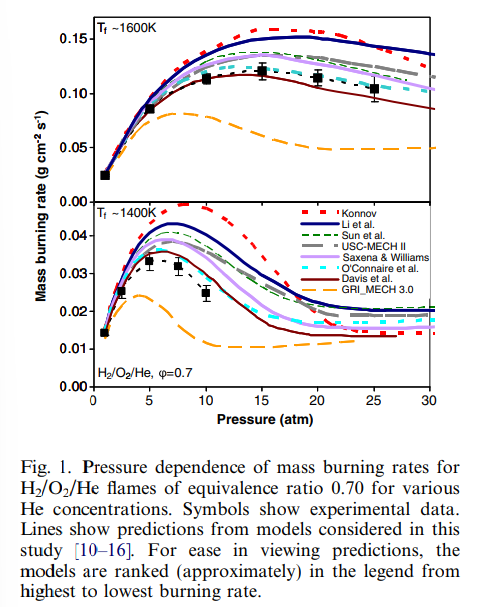


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps   

 step    size (s)    log10(ss) 
    0       1e-05       37.57...failure.
    0       5e-06       37.57...failure.
    0     2.5e-06       37.57...failure.
    0     2.5e-06       37.57...failure.
    0    1.25e-06       37.57...failure.
    0    6.25e-07       37.57...failure.
    0    6.25e-07       37.57...failure.
    0   3.125e-07       37.57...failure.
    0   1.563e-07       37.57...failure.
    0   1.563e-07       37.57...failure.
    0   7.813e-08       37.57...failure.
    0   3.906e-08       37.57...failure.
    0   3.906e-08       37.57...failure.
    0   1.953e-08       37.57...failure.
    0   9.766e-09       37.57...failure.
    0   9.766e-09       37.57...failure.
    0   4.883e-09       37.57...failure.
    0   2.441e-09       3

CanteraError: Could not find a solution for the 1D problem

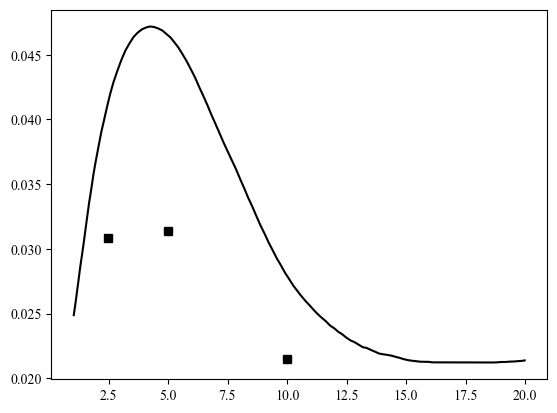

In [26]:
save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
name = 'MBR_BurkeSong'

models = {
        #   'mevel':'D:\\Research\\Models\\Mevel\\mevel.cti',
          'LMR-R':"test/data/alzuetamechanism_LMRR.yaml",            
          'Ar':"test/data/alzuetamechanism_LMRR_allAR.yaml",
          r'H$_2$O':"test/data/alzuetamechanism_LMRR_allH2O.yaml",
          }

colors = ['xkcd:purple','r','b']

for i, m in enumerate(list(models.keys())):
    p_list = np.linspace(0,20,5)[1:]
    T = 300.0  # unburned gas temperature [K]

    reactants = 'H2:0.1071, O2:0.1785, He:0.7144'  # premixed gas composition
    width = 0.03  # m
    loglevel = 1  # amount of diagnostic output (0 to 8)
    mbr = []
    for p in p_list:
        gas = ct.Solution(list(models.values())[i])
        gas.TPX = T, p*ct.one_atm, reactants
        f = ct.FreeFlame(gas, width=width)
        f.set_refine_criteria(ratio=2, slope=0.03, curve=0.06)
        f.transport_model = 'mixture-averaged'
        f.solve(loglevel=loglevel, auto=True)
        mbr.append(f.velocity[0]*f.density[0] / 10) # g/cm2*s
    ax.semilogy(p_list, mbr, '-', linestyle='solid', color=colors[i], label=m)


path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"
dataset0 = pd.read_csv(path+'5 FS H2O (Burke)\\black.csv')
ax.plot(dataset0.iloc[:, 0],dataset0.iloc[:, 1],color='k', zorder=2, fillstyle='full', linestyle = 'solid', label="Keromnes et al.")
dataset1 = pd.read_csv(path+'5 FS H2O (Burke)\\exp_pts.csv')
ax.plot(dataset1.iloc[:, 0],dataset1.iloc[:, 1],marker='s',color='k', markersize=6, zorder=3, fillstyle='full', linestyle = 'None', label="Burke et al.")


ax.legend(fontsize=15, frameon=False)#, loc='upper right')  
ax.set_ylabel(r'Mass burning rate (g cm$^\mathdefault{-2}$ s$^\mathdefault{-1}$)', fontsize=18)
ax.set_xlabel(r'Pressure (atm)', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.tick_params(axis='both', which='minor', direction="in")#, bottom=False)
ax.set_ylim([0.00,0.04999])


if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()     

#### 5.2) NH3/air mixture 
* Figure 1: ["Effect of Chemistry and Transport Properties on Near-Limit Flames at Microgravity" (Paul D Ronney)](https://drive.google.com/file/d/187j_Co3Qqg4c6BtydoD7PCRcT2uURtrj/view?usp=sharing)

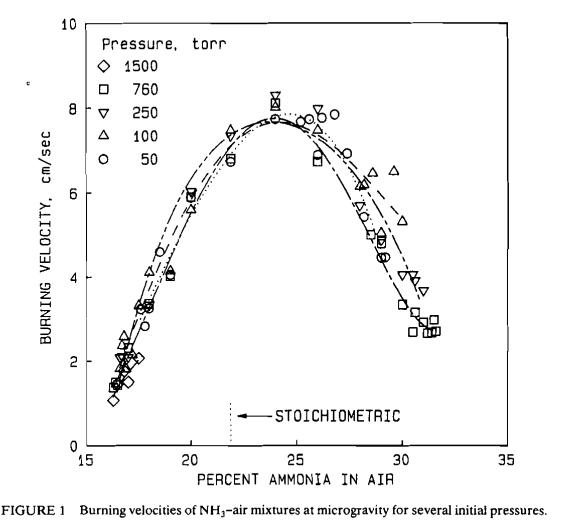


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...

Damped Newton iteration:
-----------------------------------------------------------------
m     F_damp     F_bound     log10(ss)   log10(s0)   log10(s1)  N_jac   Age
-----------------------------------------------------------------

At limits.
    failure. 
Take 10 timesteps   

 step    size (s)    log10(ss) 
    0       1e-05       34.48
Re-evaluating Jacobian, since no damping coefficient
could be found with this Jacobian.
...failure.
    0       5e-06       34.48
Re-evaluating Jacobian, since no damping coefficient
could be found with this Jacobian.
...failure.
    0     2.5e-06       34.48

     log10(ss)     log10(s1)   N_jac
    ------------------------------------
       34.4775       11.4394       3
Re-evaluating Jacobian, since no damping coefficient
could be found w

CanteraError: Could not find a solution for the 1D problem

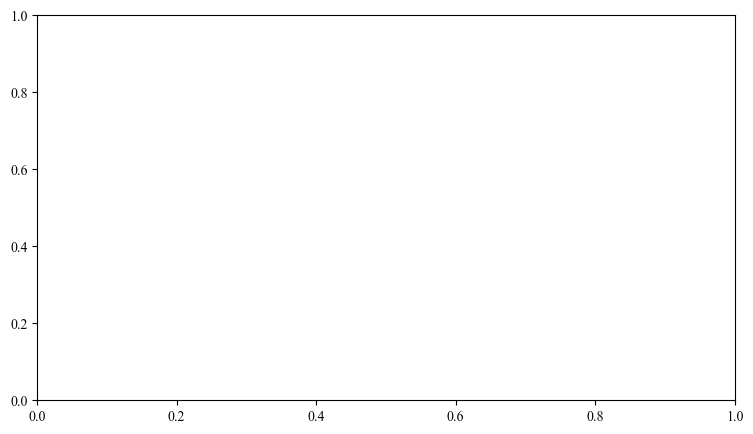

In [18]:
#%%
# REPRODUCING RONNEY FIGURE 1
import sys, os
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'
from matplotlib.legend_handler import HandlerTuple

save_plots = True
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
name = 'ronney_flamespeed'

models = {
          'LMR-R':"test/data/alzuetamechanism_LMRR.yaml",            
          'Ar':"test/data/alzuetamechanism_LMRR_allAR.yaml",
          r'H$_2$O':"test/data/alzuetamechanism_LMRR_allH2O.yaml",
          }

# p_list = [50,100,250,760,1500]
p_list=[760]
NH3_list = np.linspace(0.175,0.32,5)

colors = ['xkcd:purple','r','b']
lines = ['-','--',':',(0, (5, 10)),(0, (3, 5, 1, 5, 1, 5))]

Tin = 300.0  # unburned gas temperature [K]
width = 0.03  # m
loglevel = 1  # amount of diagnostic output (0 to 8)

for k, m in enumerate(models):
    for i, p in enumerate(p_list):
        mbr = []
        for j, NH3 in enumerate(NH3_list):
            gas = ct.Solution(list(models.values())[k])
            ox_frac = 1 - NH3
            O2 = ox_frac*0.21
            N2 = ox_frac*0.79
            X = {'NH3':NH3, 'O2':O2, 'N2':N2}
            gas.TPX = Tin, (p/760)*ct.one_atm, X
            f = ct.FreeFlame(gas, width=width)
            f.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
            f.transport_model = 'mixture-averaged'
            # f.transport_model = 'multicomponent'
            f.solve(loglevel=loglevel, auto=True)
            mbr.append(f.velocity[0] * 100) # cm/s
        ax.plot(NH3_list*100,mbr,label=m, color=colors[k],linestyle=lines[i])
        
        
def plotPoints(fname, label, shape,color):
    dataset = pd.read_csv(fname)
    ax.plot(dataset.iloc[:,0],dataset.iloc[:,1],shape,fillstyle='none',linestyle='none',color=color)#,label=label)
    
path="G:\\Mon disque\\Columbia\\Burke Lab\\01 Mixture Rules Project\\Graph Reading\\"

# plotPoints(path+'\\6 FS NH3 (Stagni-Ronney)\\50torr.csv','50 torr','o','k')
# plotPoints(path+'\\6 FS NH3 (Stagni-Ronney)\\100torr.csv','100 torr','^','k')
# plotPoints(path+'\\6 FS NH3 (Stagni-Ronney)\\250torr.csv','250 torr','v','k')
plotPoints(path+'\\6 FS NH3 (Stagni-Ronney)\\760torr.csv','Ronney','s','k')
# plotPoints(path+'\\6 FS NH3 (Stagni-Ronney)\\1500torr.csv','1500 torr','D','k')

ax.legend(fontsize=15, frameon=False)#, loc='upper right')  
ax.set_ylabel(r'Burning Velocity [cm $\rm s^{-1}$]', fontsize=18)
ax.set_xlabel(r'Percent Ammonia in Air [%]', fontsize=18)
ax.tick_params(axis='both', direction="in", labelsize=15)
ax.tick_params(axis='both', which='minor', direction="in")

if save_plots == True:
    plt.savefig(name+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(name+'.png', dpi=1000, bbox_inches='tight')
plt.show()     